# Project Name - Online Retail Customer Segmentation

# Project Type - Unsupervised Machine Learning

# Contribution - Individual

# Name - Tushar Raskar

# GitHub Link

https://github.com/tusharraskar/Online-Retail-Customer-Segmentation.git

# Problem Statement

### Business Problem Overview

Online retail businesses face the challenge of understanding their customer base in order to effectively target their marketing efforts and improve customer satisfaction. 

Customer segmentation is a process of dividing customers into groups based on shared characteristics such as demographics, purchasing behavior, and online behavior. 

The goal of online retail customer segmentation is to gain insights into customer needs and preferences, and to develop targeted marketing strategies that address the unique needs and behaviors of each segment. 

This can help increase customer loyalty, improve sales, and drive growth for the business.

### Business Objective

The objective of online retail customer segmentation is to identify and understand different customer segments and their unique needs, behaviors, and preferences. 

This allows the business to tailor their marketing and sales strategies to each segment, increase customer satisfaction, and ultimately increase customer loyalty and revenue. 

The ultimate goal is to provide a personalized experience for each customer, resulting in increased brand loyalty and long-term customer engagement.

### Feature Description 

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Import Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Dataset Loading
data = pd.read_csv('Online Retail.csv')

In [3]:
# Viewing data's first 5 row

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# Chicking shape of data

data.shape

(541909, 8)

#### Data has 541909 rows and 8 columns.

In [5]:
# Dataset Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
# Checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Ckechking null or missing values

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### In our data there is null valuse in
1. Description = 1454
2. CustomerID = 135080

Customer ID is our Identification feature and Description has Product description.

We cannot do Clustering without Customer ID values.

## Checking unique values in each feature

In [8]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## Data Describe

In [9]:
# Creating copy of the current data and assigning to df
df=data.copy()

In [10]:
df.dropna(subset=['CustomerID'],inplace=True) 

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
data.describe() 

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


(0.0, 80100.0)

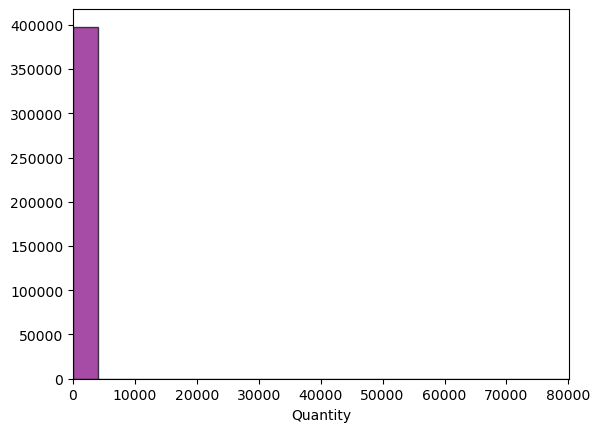

In [44]:
# Checking distrubution of Quantity

plt.hist(df['Quantity'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Quantity')


Customer ID is our Identification feature and Description has Product description.

We cannot do Clustering without Customer ID values.

Hence, droppingg the missing values

In [14]:
# removing data which hnave negetive values
df=df[df['Quantity']>0]

In [15]:
# Checking data types
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [16]:
df.shape

(397924, 8)

### Our data got reduced now we have 397924 datapoints

# Feature Engineering

In [17]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 12/1/10 8:26.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format='%m/%d/%y %H:%M')

In [18]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [19]:
# extracting month from the Invoice date
df['Month']=df['InvoiceDate'].dt.month_name()

In [20]:
# extracting day from the Invoice date
df['Day']=df['InvoiceDate'].dt.day_name()

In [21]:
# Making total amount column by multiplying quantity with price
df['TotalAmount']=df['Quantity']*df['UnitPrice'] 

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


# Exploratory Data Analysis

In [23]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

# Exploring StockCode feature - Univariate and Bivariate analysis

In [54]:
# Checking the number of unique StockCodes
print("Number of unique StockCodes: ", len(data.StockCode.unique()))

Number of unique StockCodes:  4070


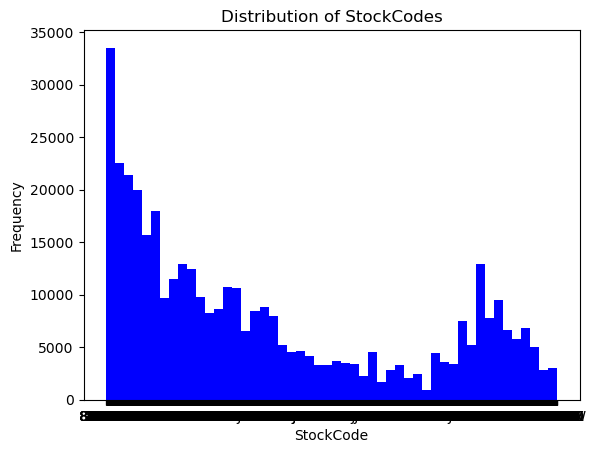

In [59]:
# Plotting the distribution of StockCodes
plt.hist(df.StockCode, bins = 50, color = 'blue')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.title('Distribution of StockCodes')
plt.show()

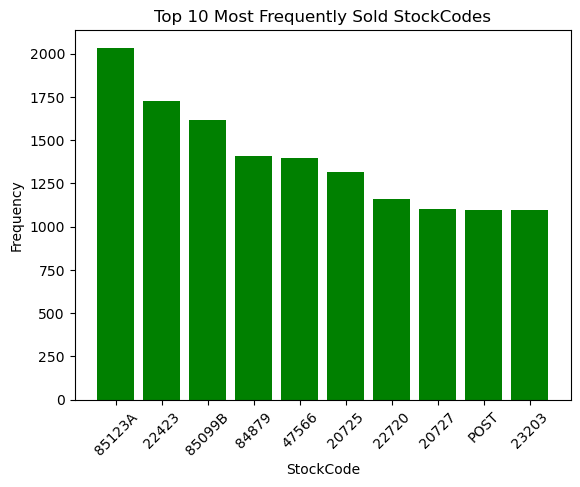

In [60]:
# Plotting the top 10 most frequently sold StockCodes
top_10 = df.StockCode.value_counts().head(10)
plt.bar(top_10.index, top_10.values, color = 'green')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequently Sold StockCodes')
plt.xticks(rotation = 45)
plt.show()

In [75]:
df.StockCode.value_counts().head(10)

85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
20725     1317
22720     1159
20727     1105
POST      1099
23203     1098
Name: StockCode, dtype: int64

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the analysis of the most frequently sold StockCode in the online retail business are:

The most frequently sold product is StockCode 85123A with 2035 sales, followed by StockCode 22423 with 1724 sales.

The top 10 most frequently sold StockCode represents a significant proportion of the overall sales, accounting for more than 10,000 sales in total.

The products with StockCode 85099B, 84879, 47566, and 20725 are also among the top-selling products, indicating a strong demand for these specific items.

The StockCode POST represents a significant number of sales, which could indicate the popularity of postage and delivery services among the customers.

The data also suggests that there is a mix of unique products (represented by different StockCodes) as well as repeat purchases of the same items, indicating customer loyalty and repeat business.

##### 3. Will the gained insights help creating a positive business impact?   

 By identifying the low-demand products, the company can redirect its resources towards more popular products, increasing their sales and profitability

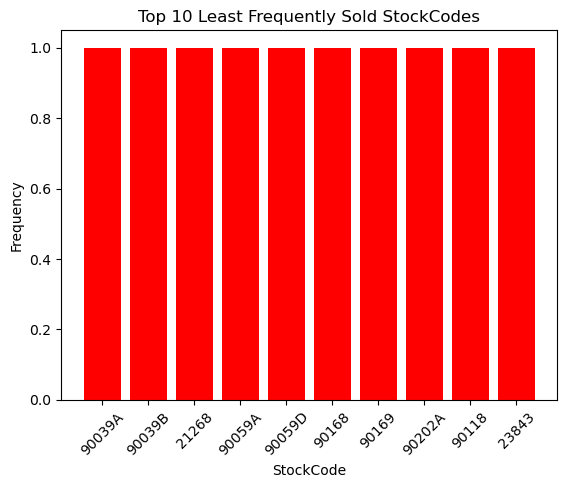

In [61]:
# Plotting the top 10 least frequently sold StockCodes
top_10 = df.StockCode.value_counts().tail(10)
plt.bar(top_10.index, top_10.values, color = 'red')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.title('Top 10 Least Frequently Sold StockCodes')
plt.xticks(rotation = 45)
plt.show()

In [74]:
df.StockCode.value_counts().tail(10)

90039A    1
90039B    1
21268     1
90059A    1
90059D    1
90168     1
90169     1
90202A    1
90118     1
23843     1
Name: StockCode, dtype: int64

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

The top 10 least frequently sold StockCodes are all sold only once. 

This could indicate low demand for these products, which could lead to insights such as the need for marketing efforts to increase demand, or discontinuing the production of these items. 

##### 3. Will the gained insights help creating a positive business impact?   

Yes, The insight that the interested response rate for males is higher (13.84%) than for females (10.39%) could be used to inform the company's marketing efforts.

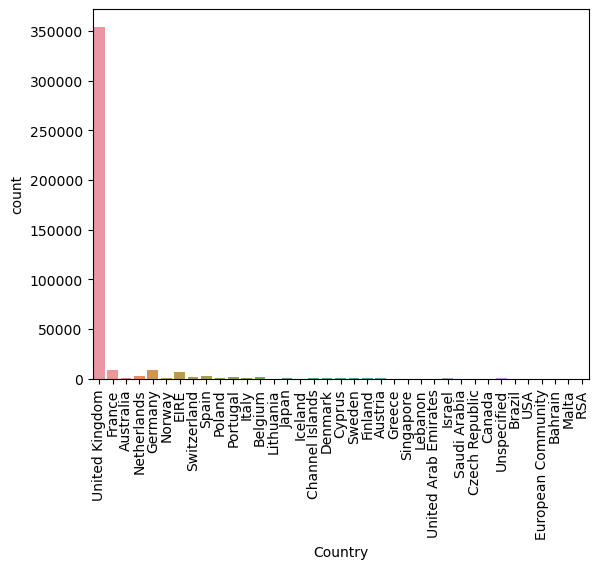

In [24]:
# Create a bar plot to show the number of transactions for each country
sns.countplot(x='Country', data=df)
plt.xticks(rotation=90)
plt.show()

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


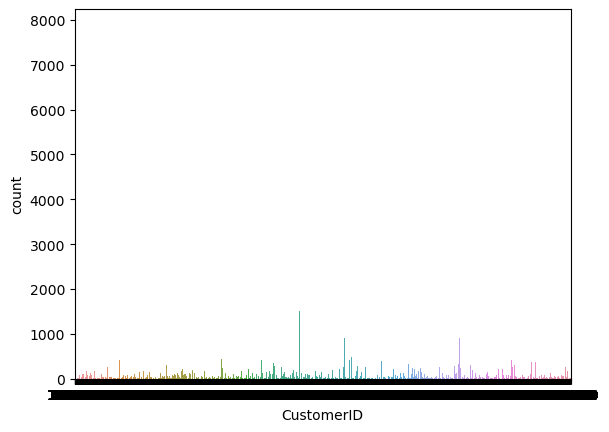

In [52]:
# check the distribution of the customer id
sns.countplot(df['CustomerID'])
plt.show()

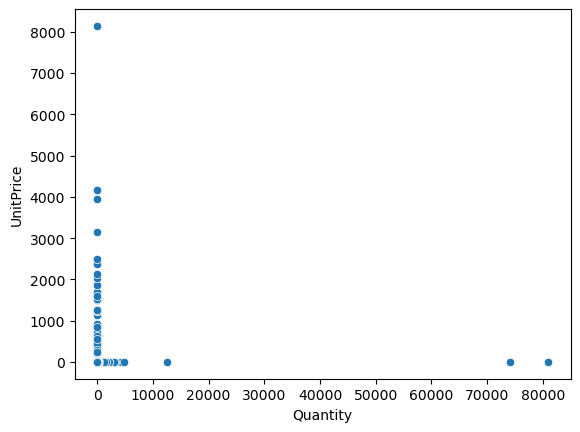

In [26]:
# Create a scatter plot to show the relationship between the quantity and unit price
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.show()

In [45]:
max(df['UnitPrice'])

8142.75

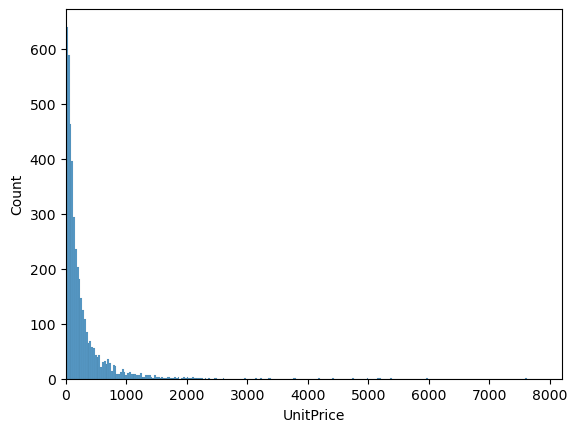

In [46]:
# Calculate the total purchase value for each customer
customer_total = df.groupby('CustomerID')['UnitPrice'].sum()

# Create a histogram to show the distribution of the total purchase value
sns.histplot(customer_total)
plt.xlim([0, 8200])

plt.show()

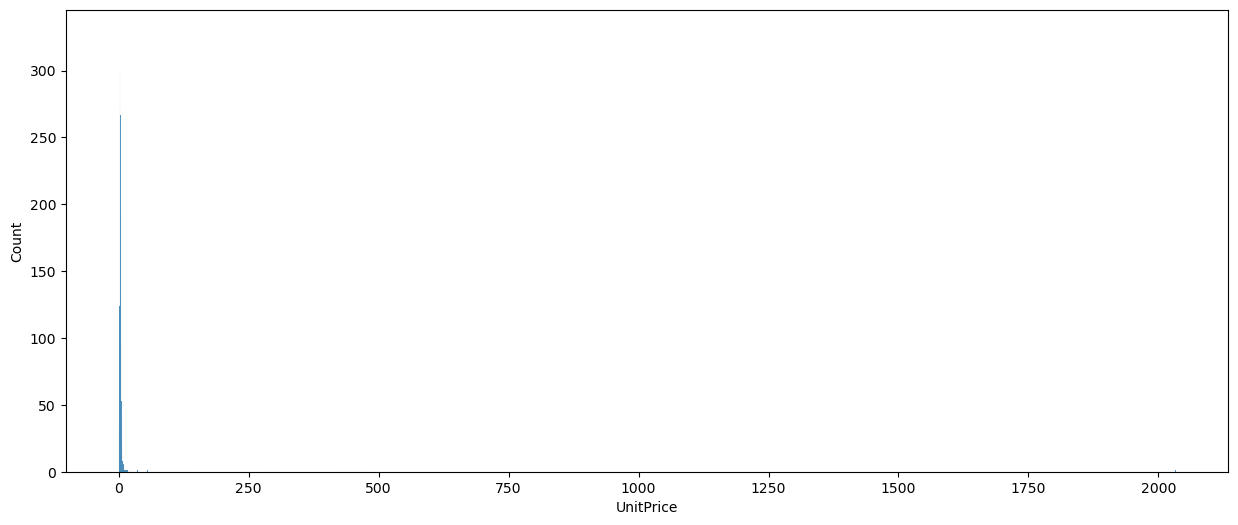

In [48]:
# Calculate the average purchase value for each customer
customer_avg = df.groupby('CustomerID')['UnitPrice'].mean()

# Create a histogram to show the distribution of the average purchase value
plt.figure(figsize=(15,6))
sns.histplot(customer_avg)
plt.show() 

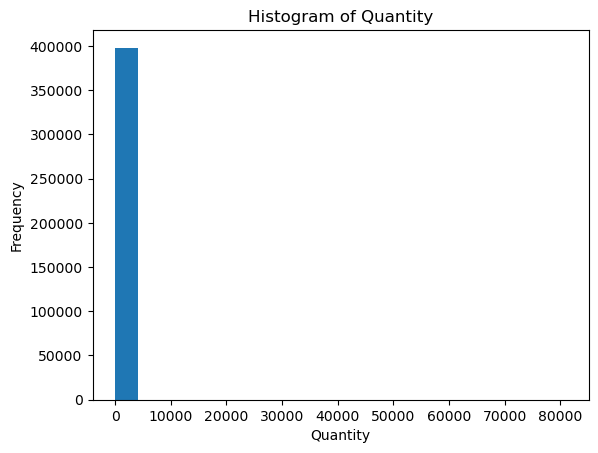

In [49]:
# Plot histogram of Quantity
plt.hist(df['Quantity'], bins=20)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')
plt.show()

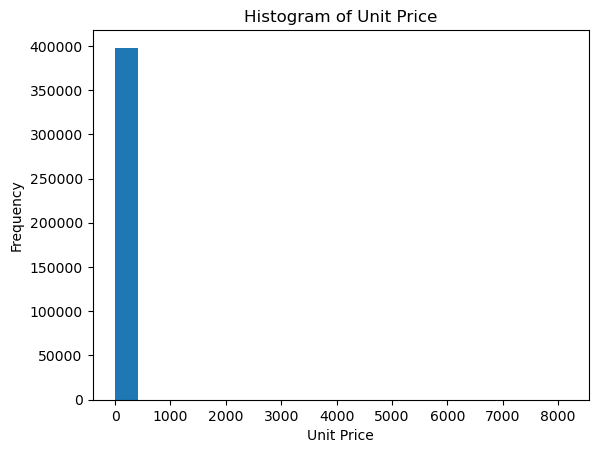

In [50]:
# Plot histogram of UnitPrice
plt.hist(df['UnitPrice'], bins=20)
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Histogram of Unit Price')
plt.show()


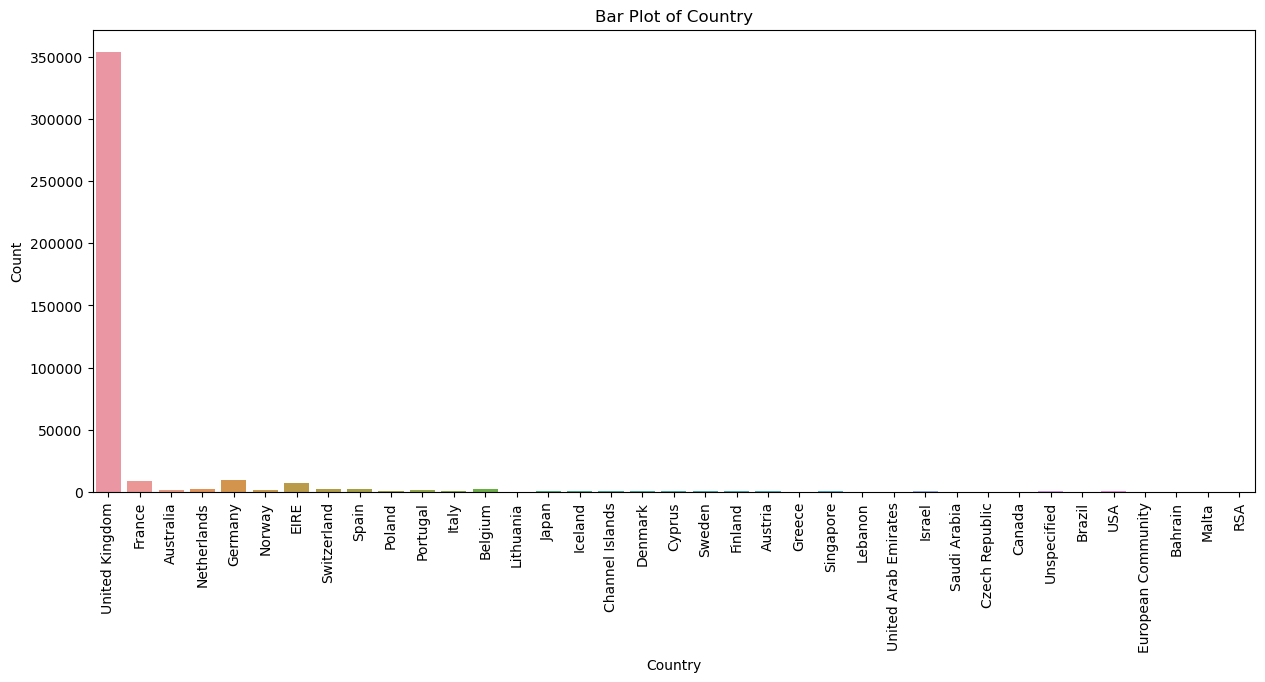

In [51]:
# Plot bar plot of Country
plt.figure(figsize=(15,6))
sns.countplot(x='Country', data=df)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Bar Plot of Country')
plt.show()


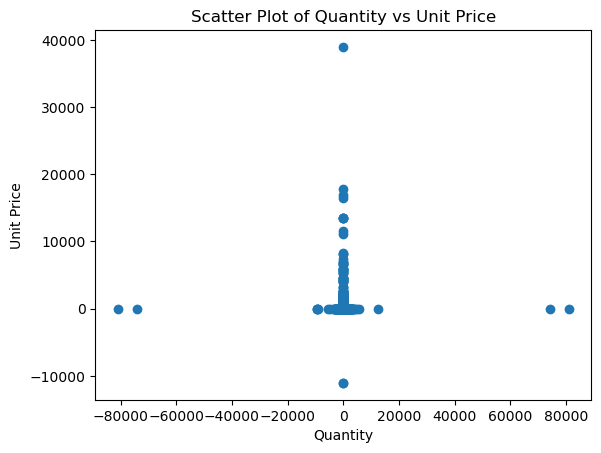

In [36]:
# Plot scatter plot of Quantity vs UnitPrice
plt.scatter(data['Quantity'], data['UnitPrice'])
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Scatter Plot of Quantity vs Unit Price')
plt.show()

In [29]:
top_10_product=df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_product

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


Text(0.5, 1.0, 'Top 10 products')

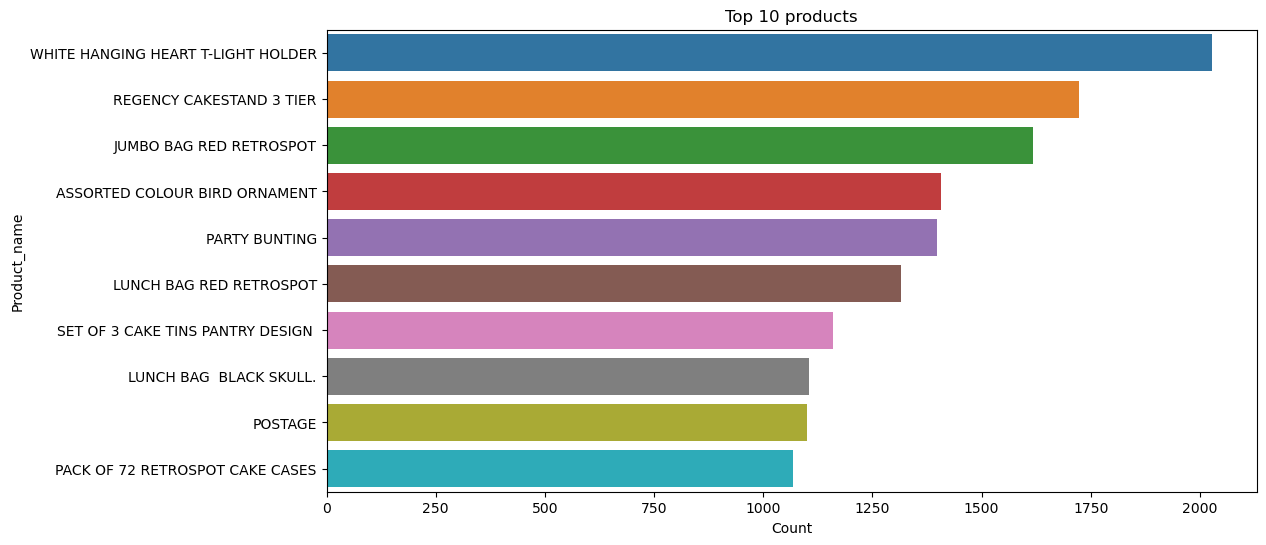

In [30]:
# top 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_product['Count'],y=top_10_product['Product_name'])
plt.title('Top 10 products')